In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from collections import Counter
#import tqdm
ROOT.ROOT.EnableImplicitMT()

Welcome to JupyROOT 6.28/00


In [2]:
if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

In [24]:
date = "JUN21"

chainSGN = ROOT.TChain("events")
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

#D0Star

df = df.Define("scale", "w*lumiIntegrated")\
            .Define("goodMeson_ditrk_mass_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -321, 211, 421, 423, 25)[3]")\
            .Define("goodMeson_ditrk_pt_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -321, 211, 421, 423, 25)[0]")\
            .Define("goodMeson_leadtrk_pt_GEN", "getMaximum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -321, 421, 423, 25), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 421, 423, 25))")\
            .Define("goodMeson_subleadtrk_pt_GEN", "getMinimum(getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -321, 421, 423, 25), getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 421, 423, 25))")\
            .Define("goodPhotons_pt_GEN", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)")\
            .Define("goodMeson_DR_GEN", "getDR(GenPart_eta, GenPart_phi, GenPart_pdgId, GenPart_genPartIdxMother, -321, 421, 423, 25, 211, 421, 423, 25)")\
            .Define("goodMeson_mass_GEN", "getD0StarPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[3]")\
            .Define("goodMeson_pt_GEN", "getD0StarPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[0]")\
            .Define("HCandMass_GEN", "getHiggsPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 423, 25, 22, 25)[3]")\
            .Define("HCandMassMissing", "compute_HiggsVars_var(goodMeson_ditrk_pt[0],goodMeson_ditrk_eta[0],goodMeson_ditrk_phi[0],goodMeson_ditrk_mass[0],photon_pt,goodPhotons_eta[index_pair[1]],goodPhotons_phi[index_pair[1]],0)")\
            .Define("HCandMassMissing_GEN", "getHiggsPtEtaPhiMD0StarDitrack(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[3]")\
            .Define("HCandPtMissing_GEN", "getHiggsPtEtaPhiMD0StarDitrack(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother)[1]")\
            .Define("photon_D0Star", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 22, 423, 25)")\
            .Define("pion_D0Star", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 111, 423, 25)")\
            .Define("HCandMassFilt", "Vec_f {HCandMass}")\
            .Define("photon_D0Star_size", "photon_D0Star.size()")
#Phi3

#df = df.Define("HCandMassGen", "getHiggsPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 333, 25, 22, 25)[3]")


In [25]:
#df=df.Filter("photon_D0Star_size == 0")

18189.0 120.59369696547992 2.9775594886331347


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


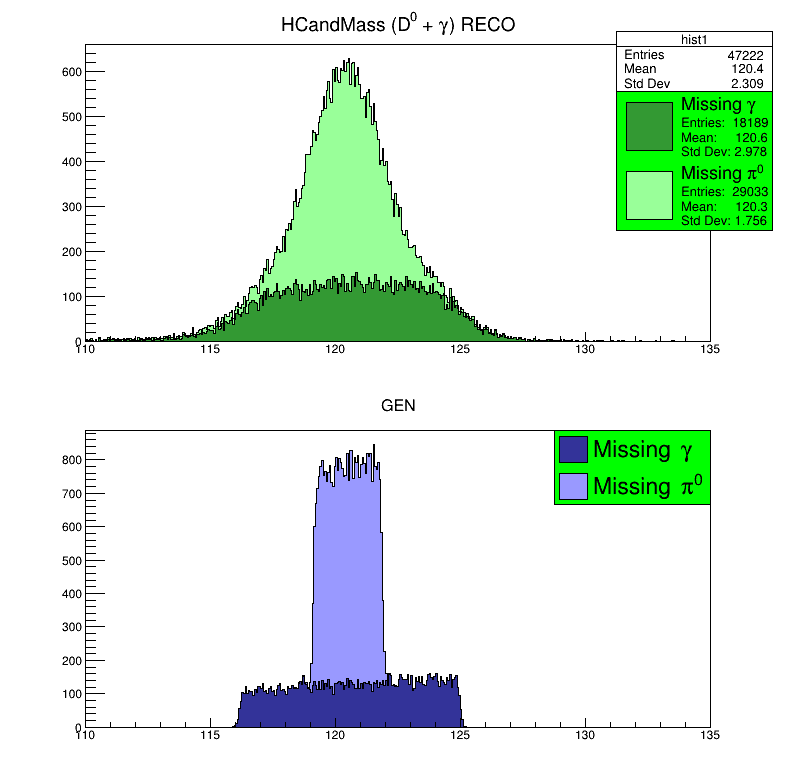

In [261]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 800)

canvas.Divide(1, 2)

bins, xlow, xhigh = 400, 110, 135

#h1=df.Histo1D(("hist", "HCandMass (D^{0} + #gamma + #gamma/#pi^{0}) RECO", bins, xlow, xhigh),"HCandMass")

#h2=df.Histo1D(("hist", "HCandMass (D^{0} + #gamma + #gamma/#pi^{0}) GEN", bins, xlow, xhigh),"HCandMass_GEN")

h1=df.Filter("photon_D0Star_size == 1").Histo1D(("hist1", "HCandMass (D^{0} + #gamma) missing photon RECO", bins, xlow, xhigh),"HCandMassMissing")

h13=df.Histo1D(("hist1", "HCandMass (D^{0} + #gamma) RECO", bins, xlow, xhigh),"HCandMassMissing")

h2=df.Filter("photon_D0Star_size == 1").Histo1D(("hist2", "HCandMass (D^{0} + #gamma) missing photon GEN", bins, xlow, xhigh),"HCandMassMissing_GEN")

h3=df.Filter("photon_D0Star_size == 0").Histo1D(("hist3", "HCandMass (D^{0} + #gamma) missing pion RECO", bins, xlow, xhigh),"HCandMassMissing")

h4=df.Filter("photon_D0Star_size == 0").Histo1D(("hist4", "HCandMass (D^{0} + #gamma) missing pion GEN", bins, xlow, xhigh),"HCandMassMissing_GEN")

h1.SetFillColor(ROOT.kGreen-2)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kBlue-2)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kGreen-9)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kBlue-9)
h4.SetLineColor(ROOT.kBlack)
canvas.cd(1)

#h13.Draw()
#canvas.Update()
#ROOT.gPad.Update()
#ps1 = h13.GetListOfFunctions().FindObject("stats")
#ps1.SetX1NDC(0.7)
#ps1.SetX2NDC(0.9)
#ps1.SetY1NDC(0.5)
#ps1.SetY2NDC(0.7)
h13.Draw("hist")
print(h1.GetEntries(), h1.GetMean(), h1.GetStdDev())
stack12 = ROOT.THStack("stack", "RECO")
stack12.Add(h1.GetValue())
stack12.Add(h3.GetValue())
stack12.Draw("hist same")
ROOT.gStyle.SetLegendFillColor(3)
ROOT.gStyle.SetLegendBorderSize(1)
legend12 = ROOT.TLegend(0.78, 0.40, 0.98, 0.773)

legend12.AddEntry(h1.GetValue(), "#splitline{{#splitline{{#scale[1.4]{{Missing #gamma}}}}{{Entries:  {0}}}}}{{#splitline{{Mean:     {1}}}{{Std Dev: {2}}}}}".format(int(h1.GetEntries()), round(h1.GetMean(), 1), round(h1.GetStdDev(), 3)), "f")
legend12.AddEntry(h3.GetValue(), "#splitline{{#scale[1.4]{{Missing #pi^{{0}}}}}}{{#splitline{{Entries:  {0}}}{{#splitline{{Mean:     {1}}}{{Std Dev: {2}}}}}}}".format(int(h3.GetEntries()), round(h3.GetMean(), 1), round(h3.GetStdDev(), 3)), "f")
legend12.SetEntrySeparation(0.79)
legend12.SetMargin(0.42)
legend12.Draw()



canvas.cd(2)
stack = ROOT.THStack("stack", "GEN")
stack.Add(h2.GetValue())
stack.Add(h4.GetValue())
stack.Draw("hist")
legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend.AddEntry(h2.GetValue(), "Missing #gamma", "f")
legend.AddEntry(h4.GetValue(), "Missing #pi^{0}", "f")
ROOT.gStyle.SetLegendBorderSize(1)
legend.Draw()





canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


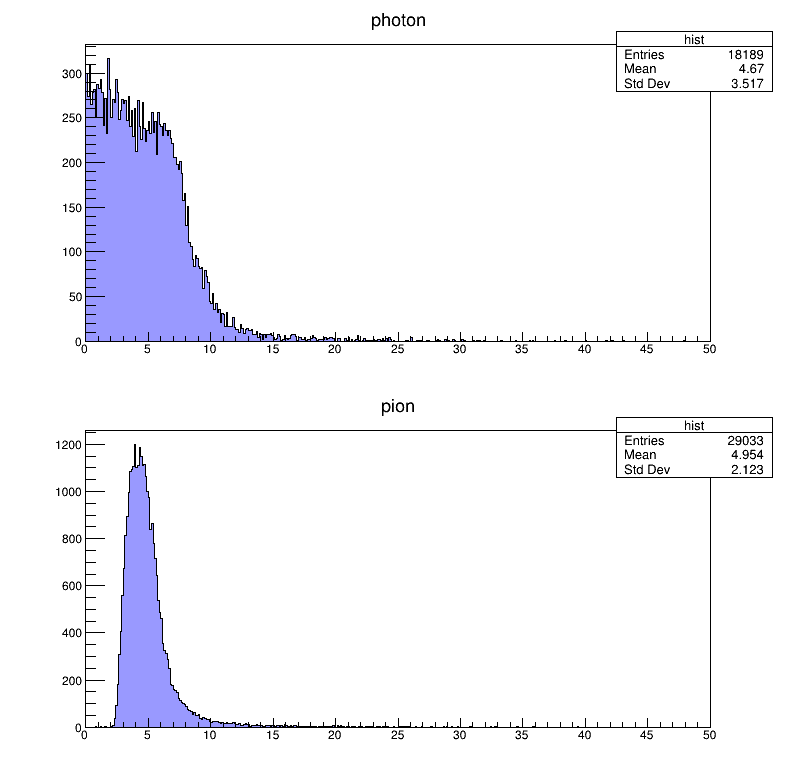

In [27]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 800)
canvas.Divide(1, 2)
bins, xlow, xhigh = 400, 0, 50

h3=df.Histo1D(("hist", "photon", bins, xlow, xhigh), "photon_D0Star")
h4=df.Histo1D(("hist", "pion", bins, xlow, xhigh), "pion_D0Star")

h3.SetFillColor(ROOT.kBlue-9)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kBlue-9)
h4.SetLineColor(ROOT.kBlack)

canvas.cd(1)
h3.Draw("hist")
canvas.cd(2)
h4.Draw("hist")

canvas.Draw()

In [29]:
cols = ["HCandMassFilt", "HCandMassMissing"]

x = df.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)



display(pddf)

,HCandMassFilt,HCandMassMissing
0,[-22615.298828125],120.146187
1,[-22652.28515625],118.170601
2,[-22693.373046875],114.872078
3,[-22586.0859375],119.687584
4,[-22670.15234375],119.116539
...,...,...
47217,[-22644.728515625],120.642433
47218,[-22641.951171875],121.881744
47219,[126.01466369628906],116.433670
47220,[129.121337890625],120.545891


In [40]:
dfnew = df.Define("D0_info_GEN", "get2BodyPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, -321, 211, 421, 423, 25)")\
    .Define("Ph_info_GEN", "getPtEtaPhiM(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, GenPart_genPartIdxMother, 22, 25)")


cols = ["D0_info_GEN", "Ph_info_GEN", "GenPart_pdgId", "GenPart_genPartIdxMother", "GenPart_pt", "GenPart_eta", "GenPart_phi"]

x = dfnew.AsNumpy(columns=cols)

pddf = pd.DataFrame(x)

pddf["H_info_GEN"] = pddf.apply(lambda row: ROOT.sum2Body(row["D0_info_GEN"][0], row["D0_info_GEN"][1], row["D0_info_GEN"][2],\
                                                row["D0_info_GEN"][3], row["Ph_info_GEN"][0], row["Ph_info_GEN"][1],\
                                                row["Ph_info_GEN"][2], 0.0), axis=1)

pddf["H_mass_GEN"] = pddf.apply(lambda row: row["H_info_GEN"].M(), axis=1)

pddf = pddf[(pddf["H_mass_GEN"] > 0.1) & (pddf["H_mass_GEN"] > 10)]

display(pddf)

,D0_info_GEN,Ph_info_GEN,GenPart_pdgId,GenPart_genPartIdxMother,GenPart_pt,GenPart_eta,GenPart_phi,H_info_GEN,H_mass_GEN
0,"[53.330726623535156, 0.2626495361328125, 0.848...","[54.125, -0.708984375, -2.515625, 0.0]","[2212, 2212, 21, 2, 25, 2, 25, 25, 25, 25, 2, ...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 8, 5, 9, 11, 11,...","[0.0, 0.0, 0.0, 0.0, 8.96875, 8.96875, 9.125, ...","[29248.0, -29248.0, 22784.0, -23872.0, -1.7851...","[0.0, 0.0, 0.0, 0.0, 2.3203125, -0.822265625, ...","(11.938,-1.57175,2.37402,119.826)",119.826385
1,"[56.99903106689453, -0.03479326143860817, 1.93...","[66.25, -0.07275390625, -0.7421875, 0.0]","[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 25, 2...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 8, 9, 10, 10, 0,...","[0.0, 0.0, 0.0, 0.0, 26.125, 26.125, 30.9375, ...","[29248.0, -29248.0, 22912.0, -22848.0, -0.2529...","[0.0, 0.0, 0.0, 0.0, 1.0546875, -2.0859375, 0....","(29.7571,-0.226828,0.289048,119.657)",119.657204
2,"[175.74452209472656, 0.11130570620298386, -0.6...","[81.0, 0.4443359375, 0.3193359375, 0.0]","[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 5, -5...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 1, 1, 10, 11, 12...","[0.0, 0.0, 0.0, 0.0, 259.0, 259.0, 291.0, 258....","[29248.0, -29248.0, 22976.0, -23104.0, 0.06542...","[0.0, 0.0, 0.0, 0.0, -0.4208984375, 2.71875, -...","(231.852,0.242551,-0.3511,117.308)",117.308144
3,"[53.977813720703125, -1.2418246269226074, -2.9...","[65.75, -0.935546875, -0.049560546875, 0.0]","[2212, 2212, 21, 21, 25, 21, 25, 25, 21, 25, 2...","[-1, -1, 0, 1, 2, 2, 4, 6, 5, 7, 9, 9, 0, 1, 0...","[0.0, 0.0, 0.0, 0.0, 19.4375, 19.4375, 21.5625...","[29248.0, -29248.0, 23360.0, -22912.0, -2.8125...","[0.0, 0.0, 0.0, 0.0, -1.1015625, 2.0390625, -0...","(17.9091,-2.8643,-0.79517,119.819)",119.818634
4,"[54.1204948425293, -0.21947802603244781, -0.43...","[64.25, 0.205078125, 2.390625, 0.0]","[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 4, 4,...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 0, 1, 10, 0, 11,...","[0.0, 0.0, 0.0, 0.0, 22.75, 22.75, 21.9375, 15...","[29248.0, -29248.0, 22848.0, -23040.0, 0.22314...","[0.0, 0.0, 0.0, 0.0, 1.8984375, -1.24609375, 1...","(21.2477,0.0609087,1.46897,119.181)",119.180626
...,...,...,...,...,...,...,...,...,...
47217,"[47.11843490600586, -1.5807474851608276, 0.247...","[50.375, -0.24072265625, -3.0703125, 0.0]","[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 25, 2...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 8, 1, 9, 9, 1, 0...","[0.0, 0.0, 0.0, 0.0, 8.375, 8.375, 13.65625, 1...","[29248.0, -29248.0, 22784.0, -22912.0, -3.4687...","[0.0, 0.0, 0.0, 0.0, 1.390625, -1.75, 1.390625...","(9.16828,-3.28168,2.0918,119.856)",119.855530
47218,"[60.29728317260742, 1.13931405544281, -1.37777...","[38.25, -0.380859375, 2.4921875, 0.0]","[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 25, 2...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 8, 5, 9, 11, 11,...","[0.0, 0.0, 0.0, 0.0, 35.125, 35.125, 42.125, 4...","[29248.0, -29248.0, 23168.0, -22784.0, 1.58593...","[0.0, 0.0, 0.0, 0.0, -1.953125, 1.1875, -2.140...","(40.7003,1.30631,-2.05365,120.41)",120.410477
47219,"[65.37449645996094, 0.0414070263504982, -0.996...","[40.25, -1.01953125, 2.359375, 0.0]","[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 25, 2...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 8, 9, 10, 10, 1,...","[0.0, 0.0, 0.0, 0.0, 21.625, 21.625, 36.0, 37....","[29248.0, -29248.0, 22784.0, -22848.0, -1.4335...","[0.0, 0.0, 0.0, 0.0, -1.1953125, 1.9453125, -1...","(27.4076,-1.28636,-1.31314,116.886)",116.886360
47220,"[120.36846923828125, -0.23320552706718445, -2....","[101.0, -0.46875, 2.84375, 0.0]","[2212, 2212, 21, 21, 25, 21, 25, 25, 25, 25, -...","[-1, -1, 0, 1, 2, 2, 4, 6, 7, 8, 12, 1, 14, 11...","[0.0, 0.0, 0.0, 0.0, 142.0, 142.0, 197.5, 203....","[29248.0, -29248.0, 22848.0, -23232.0, -0.6914...","[0.0, 0.0, 0.0, 0.0, -2.765625, 0.3779296875, ...","(187.518,-0.401967,-2.82157,120.527)",120.526627


In [41]:
rownum = 12
part_id = pddf.iloc[rownum]["GenPart_pdgId"]
mother_idx = pddf.iloc[rownum]["GenPart_genPartIdxMother"]
part_pt = pddf.iloc[rownum]["GenPart_pt"]
part_eta = pddf.iloc[rownum]["GenPart_eta"]
part_phi = pddf.iloc[rownum]["GenPart_phi"]

d0_info = pddf.iloc[rownum]["D0_info_GEN"]
ph_info = pddf.iloc[rownum]["Ph_info_GEN"]
h_info = pddf.iloc[rownum]["H_info_GEN"]

print(d0_info)
print(ph_info)

h_info1 = ROOT.sum2Body(d0_info[0], d0_info[1], d0_info[2], d0_info[3],\
                  ph_info[0], ph_info[1], ph_info[2], 0.0)

print(h_info)
print(h_info1)

width = 8
#print(len(part_id), len(mother_idx), len(part_pt), len(part_mass))
print("Index".ljust(width), "ID".ljust(width), "Mum idx".ljust(width), "PT".ljust(width), "Eta".ljust(width), "Phi".ljust(width))
print("---------------------------------------------------------------------------")
for e in range(len(part_id)):
    if(part_id[e] in [25, 423, 421, 22, -321, 211, 321, -211, 111]):
        print(str(e).ljust(width), str(part_id[e]).ljust(width), str(mother_idx[e]).ljust(width), str(round(part_pt[e], 3)).ljust(width), str(round(part_eta[e], 4)).ljust(width), str(round(part_phi[e], 4)).ljust(width))

{ 55.6250f, 0.356326f, 2.50000f, 1.85694f }
{ 55.3750f, -0.447266f, -0.695312f, 0.00000f }
(2.99155,-1.34619,-2.32289,120.073)
(2.99155,-1.34619,-2.32289,120.073)
Index    ID       Mum idx  PT       Eta      Phi     
---------------------------------------------------------------------------
4        25       2        6.406    -0.6562  2.9141  
8        25       4        10.375   -0.4258  -3.1094 
11       25       8        7.078    -0.5059  -3.0156 
16       25       11       8.469    -0.4336  -3.0156 
19       25       16       5.922    -0.582   3.0312  
23       22       19       55.375   -0.4473  -0.6953 
24       423      19       60.375   0.3564   2.5     
45       421      24       55.625   0.3564   2.5     
46       111      24       4.703    0.3555   2.5078  
55       111      40       0.11     5.625    1.6094  
56       -321     45       28.0     0.3867   2.5     
57       211      45       27.625   0.3252   2.5     


47032


47032
120.62374387093193 1.703149312083331


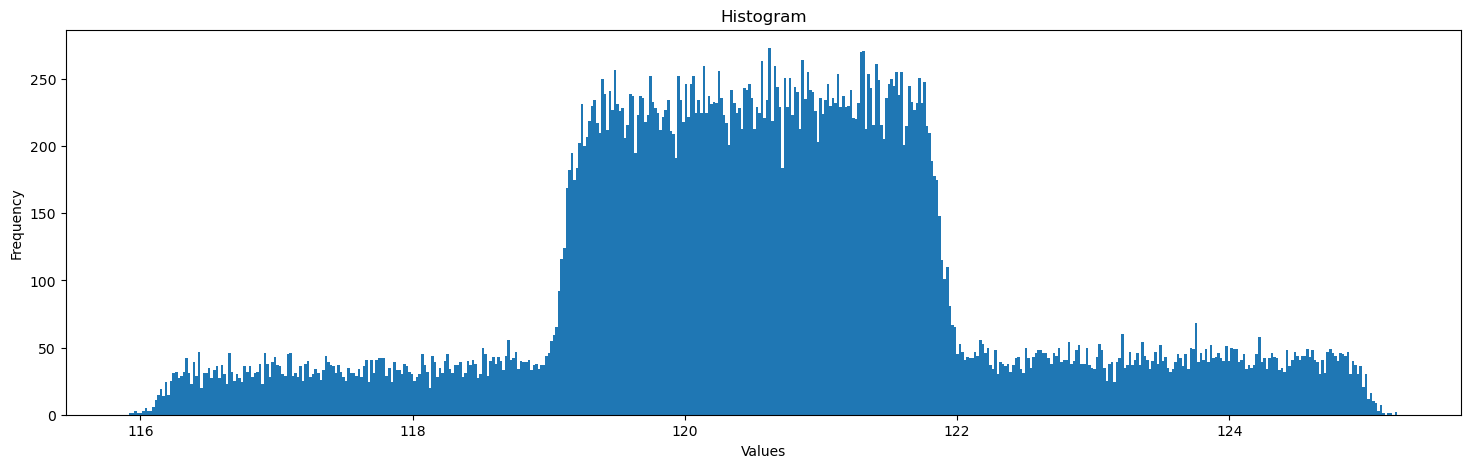

In [102]:
masses = [e.M() for e in pddf["H_info_GEN"].to_numpy()]
print(len(masses))

masses = [x for x in masses if (x > 100 and x < 130)]

print(np.mean(masses), np.std(masses))
plt.figure(figsize=(18,5))
plt.hist(masses, bins=500)

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the histogram
plt.show()